In [1]:
import os, pickle
import dask.dataframe as dd
import pandas as pd
from dask.diagnostics import ProgressBar
from scipy.signal import find_peaks
import hvplot.dask
from tqdm.notebook import tqdm
# require plot app of datashader(pip install datashader) 

In [2]:
pbar = ProgressBar()
pbar.register()

In [3]:
sample_names= ['raw_data_1', 'raw_data_2', 'raw_data_3', 'raw_data_4', 'raw_data_5']

In [4]:
raw_data_dd_dict = dict()

for name in sample_names:
    raw_data_dd_dict[name] = dd.read_parquet(os.path.join('/mnt/workspace/joystick_data', name+'.parquet'))

In [5]:
print(raw_data_dd_dict)

{'raw_data_1': Dask DataFrame Structure:
               port_1_p(bar) port_2_p(bar) port_3_p(bar) port_4_p(bar) support_p(bar) tank_p(bar) temp(c) time(hour)
npartitions=36                                                                                                      
                     float32       float32       float32       float32        float32     float32   uint8    float32
                         ...           ...           ...           ...            ...         ...     ...        ...
...                      ...           ...           ...           ...            ...         ...     ...        ...
                         ...           ...           ...           ...            ...         ...     ...        ...
                         ...           ...           ...           ...            ...         ...     ...        ...
Dask Name: read-parquet, 1 graph layer, 'raw_data_2': Dask DataFrame Structure:
               port_1_p(bar) port_2_p(bar) port_3_p(bar) por

In [6]:
print(raw_data_dd_dict['raw_data_1'].index.compute())

[########################################] | 100% Completed | 19.69 s
Index([      0,       1,       2,       3,       4,       5,       6,       7,
             8,       9,
       ...
       5654508, 5654509, 5654510, 5654511, 5654512, 5654513, 5654514, 5654515,
       5654516, 5654517],
      dtype='int64', length=505825270)


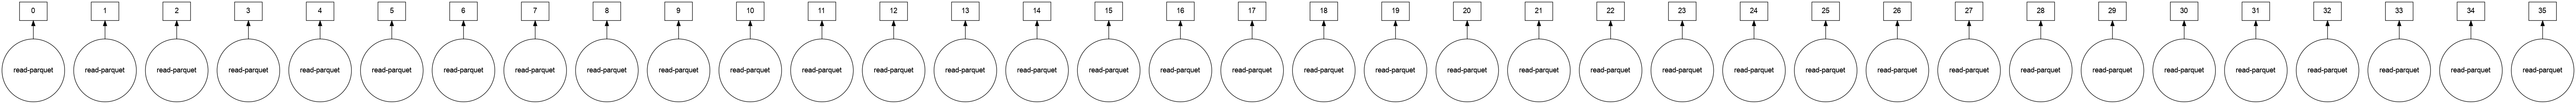

In [7]:
raw_data_dd_dict['raw_data_1'].visualize()

In [8]:
hvplot.extension('bokeh')

plot = raw_data_dd_dict['raw_data_1'].hvplot.scatter(x='time(hour)', y='port_1_p(bar)', color='red', rasterize=True) * \
       raw_data_dd_dict['raw_data_1'].hvplot.scatter(x='time(hour)', y='port_2_p(bar)', color='blue', rasterize=True) * \
       raw_data_dd_dict['raw_data_1'].hvplot.scatter(x='time(hour)', y='port_3_p(bar)', color='orange', rasterize=True) * \
       raw_data_dd_dict['raw_data_1'].hvplot.scatter(x='time(hour)', y='port_4_p(bar)', color='green', rasterize=True)

plot

[########################################] | 100% Completed | 5.60 ss
[########################################] | 100% Completed | 5.65 ss
[########################################] | 100% Completed | 20.22 s
[########################################] | 100% Completed | 5.79 ss
[########################################] | 100% Completed | 5.58 ss
[########################################] | 100% Completed | 19.30 s
[########################################] | 100% Completed | 5.76 ss
[########################################] | 100% Completed | 5.63 sms
[########################################] | 100% Completed | 18.81 s
[########################################] | 100% Completed | 5.76 ss
[########################################] | 100% Completed | 5.72 sms
[########################################] | 100% Completed | 20.59 s
[########################################] | 100% Completed | 19.53 s
[########################################] | 100% Completed | 19.24 s
[#################

:DynamicMap   []
   :Overlay
      .Image.I   :Image   [time(hour),port_1_p(bar)]   (time(hour)_port_1_p(bar) Count)
      .Image.II  :Image   [time(hour),port_2_p(bar)]   (time(hour)_port_2_p(bar) Count)
      .Image.III :Image   [time(hour),port_3_p(bar)]   (time(hour)_port_3_p(bar) Count)
      .Image.IV  :Image   [time(hour),port_4_p(bar)]   (time(hour)_port_4_p(bar) Count)

In [9]:
raw_data_dict = dict()

for name in tqdm(sample_names):
    raw_data_dict[name] = raw_data_dd_dict[name].compute()

  0%|          | 0/5 [00:00<?, ?it/s]

[########################################] | 100% Completed | 18.29 s
[########################################] | 100% Completed | 24.69 s
[########################################] | 100% Completed | 23.64 s
[########################################] | 100% Completed | 22.99 s
[########################################] | 100% Completed | 30.35 s


In [10]:
len(raw_data_dict)

5

In [11]:
p_names = ['port_1_p(bar)', 'port_2_p(bar)', 'port_3_p(bar)', 'port_4_p(bar)']

In [12]:
result_peak_data_dict = dict()
buf = list()

for name in tqdm(sample_names):
    buf.clear()
    data = raw_data_dict[name]

    for i, p_name in enumerate(p_names):
        peaks = find_peaks(data[p_name], height=(10, None), distance=50, prominence=10)[0]
        result = data.iloc[peaks].copy()
        
        extract = result[['time(hour)', p_name]]
        extract.columns = [f'time_p{i+1}(hour)', p_name]
        extract.reset_index(drop=True, inplace=True)
        
        buf.append(extract)

    result_peak_data_dict[name] = pd.concat(buf, axis=1)

  0%|          | 0/5 [00:00<?, ?it/s]

In [13]:
result_peak_data_dict

{'raw_data_1':          time_p1(hour)  port_1_p(bar)  time_p2(hour)  port_2_p(bar)  \
 0             0.000656      22.680000       0.000542      22.510000   
 1             0.000992      22.570000       0.000908      22.480000   
 2             0.001306      22.719999       0.001214      22.379999   
 3             0.001594      23.040001       0.001506      22.420000   
 4             0.001881      22.830000       0.001794      22.459999   
 ...                ...            ...            ...            ...   
 4825016    1405.069092      15.670000    1405.069214      16.370001   
 4825017    1405.069336      15.630000    1405.069580      16.389999   
 4825018    1405.069702      15.590000    1405.069824      16.340000   
 4825019    1405.069946      15.470000    1405.070068      16.450001   
 4825020            NaN            NaN            NaN            NaN   
 
          time_p3(hour)  port_3_p(bar)  time_p4(hour)  port_4_p(bar)  
 0             0.000817      23.260000       0.00

In [14]:
with open('result_peak_data.pkl', 'wb') as f:
    pickle.dump(obj=result_peak_data_dict, file=f)

In [53]:
raw_data_1_df = result_peak_data_dict['raw_data_1']
print(f'Estimated total memory usage: {(raw_data_1_df.memory_usage().sum()/(1024**3)):.3f} GByte')

Estimated total memory usage: 0.144 GByte


In [81]:
result_peak_data_dict['raw_data_1'].head()

time_p1(hour)  port_1_p(bar)  time_p2(hour)  port_2_p(bar)  time_p3(hour)  \
0       0.000656      22.680000       0.000542      22.510000       0.000817   
1       0.000992      22.570000       0.000908      22.480000       0.001142   
2       0.001306      22.719999       0.001214      22.379999       0.001436   
3       0.001594      23.040001       0.001506      22.420000       0.001725   
4       0.001881      22.830000       0.001794      22.459999       0.002011   

   port_3_p(bar)  time_p4(hour)  port_4_p(bar)  
0      23.260000       0.000742      22.900000  
1      23.360001       0.001061      22.950001  
2      23.360001       0.001358      22.980000  
3      23.230000       0.001647      23.020000  
4      23.340000       0.001933      23.030001

In [55]:
result_peak_data_dict['raw_data_1'].tail()

time_p1(hour)  port_1_p(bar)  time_p2(hour)  port_2_p(bar)  \
4825016    1405.069092          15.67    1405.069214      16.370001   
4825017    1405.069336          15.63    1405.069580      16.389999   
4825018    1405.069702          15.59    1405.069824      16.340000   
4825019    1405.069946          15.47    1405.070068      16.450001   
4825020            NaN            NaN            NaN            NaN   

         time_p3(hour)  port_3_p(bar)  time_p4(hour)  port_4_p(bar)  
4825016    1405.069458          14.18    1405.068848      18.309999  
4825017    1405.069824          13.60    1405.069092      18.440001  
4825018    1405.070068          14.31    1405.069458      18.420000  
4825019            NaN            NaN    1405.069702      18.370001  
4825020            NaN            NaN    1405.069946      18.490000

In [56]:
result_peak_data_dict['raw_data_1'].describe()

time_p1(hour)  port_1_p(bar)  time_p2(hour)  port_2_p(bar)  \
count   4.825020e+06   4.825020e+06   4.825020e+06   4.825020e+06   
mean    7.100897e+02   2.074731e+01   7.100897e+02   1.979817e+01   
std     4.039933e+02   2.023051e+00   4.039934e+02   1.834450e+00   
min     6.555556e-04   1.422000e+01   5.416666e-04   1.364000e+01   
25%     3.669313e+02   1.938000e+01   3.669313e+02   1.879000e+01   
50%     7.129763e+02   2.156000e+01   7.129762e+02   2.011000e+01   
75%     1.059104e+03   2.245000e+01   1.059104e+03   2.108000e+01   
max     1.405070e+03   2.378000e+01   1.405070e+03   2.370000e+01   

       time_p3(hour)  port_3_p(bar)  time_p4(hour)  port_4_p(bar)  
count   4.825019e+06   4.825019e+06   4.825021e+06   4.825021e+06  
mean    7.100900e+02   1.997717e+01   7.100897e+02   2.099136e+01  
std     4.039932e+02   2.800161e+00   4.039933e+02   1.004860e+00  
min     8.166667e-04   1.190000e+01   7.416666e-04   1.068000e+01  
25%     3.669317e+02   1.782000e+01   3.669312e+02   2.006000e+01  
50%     7.129766e+02   2.116000e+01   7.129762e+02   2.153000e+01  
75%     1.059105e+03   2.231000e+01   1.059104e+03   2.173000e+01  
max     1.405070e+03   2.406000e+01   1.405070e+03   2.455000e+01